In [6]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
def forecast_values(df,periods,col_name):
    model = Prophet()
    model.fit(df)
    future = model.make_future_dataframe(periods=periods,freq='M')
    forecast = model.predict(future)
    forecast = forecast[['ds','yhat']]
    predicted = str(col_name)
    forecast.rename(columns={'yhat': predicted}, inplace=True)
    return forecast

In [11]:
OPTIONS = ['Acura RDX', 'Acura RL', 'Audi Q3', 'BMW 5-Series', 'Buick Envision']
periods = 24


def create_df():
    final_df = pd.DataFrame()
    df = pd.read_csv("temp.csv")
    for index, option in enumerate(OPTIONS):
        temp_df = pd.DataFrame(columns=['ds', 'y'])
        temp_df['ds'] = df['date']
        temp_df['y'] = df[option]
        if index == 0:
            forecast = forecast_values(temp_df,periods,option)
            final_df = pd.concat([final_df,forecast])
        else:
            forecast = forecast_values(temp_df,periods,option)
            column_name = forecast.columns[-1]
            final_df[column_name] = forecast[column_name]
    return final_df

In [12]:
def hit_forecast_button():
    final_df = create_df()
    final_df.set_index('ds', inplace=True)
    final_df.plot(kind='line')

17:37:52 - cmdstanpy - INFO - Chain [1] start processing
17:37:52 - cmdstanpy - INFO - Chain [1] done processing
17:37:52 - cmdstanpy - INFO - Chain [1] start processing
17:37:52 - cmdstanpy - INFO - Chain [1] done processing
17:37:53 - cmdstanpy - INFO - Chain [1] start processing
17:37:53 - cmdstanpy - INFO - Chain [1] done processing
17:37:53 - cmdstanpy - INFO - Chain [1] start processing
17:37:53 - cmdstanpy - INFO - Chain [1] done processing
17:37:53 - cmdstanpy - INFO - Chain [1] start processing
17:37:53 - cmdstanpy - INFO - Chain [1] done processing


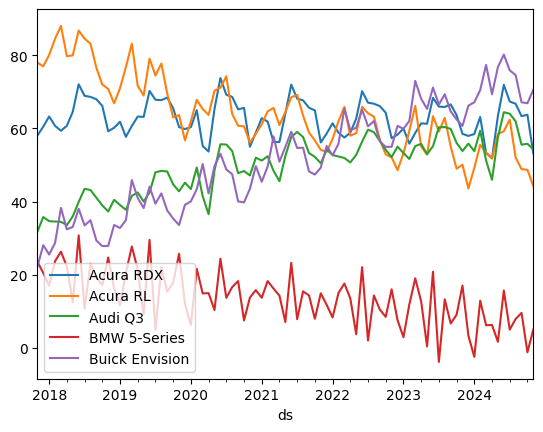

In [13]:
hit_forecast_button()